In [59]:
! pip install pandas plotly

In [60]:
import pandas as pd
import plotly.express as px

In [61]:
# 讀取Excel文件
df = pd.read_excel('/home/b10173209/test.file/X/total_results.xlsx')

In [65]:
# Group data by parameter combinations and calculate mean Val Macro F1 score
grouped_results = df.groupby(['learning_rate', 'max_depth', 'n_estimators']).agg({
    'Val Macro F1': 'mean'
}).reset_index()

# Sort results by Val Macro F1 score
sorted_results_macro_only = grouped_results.sort_values(by='Val Macro F1', ascending=False)

sorted_results_macro_only



,learning_rate,max_depth,n_estimators,Val Macro F1
35,0.10,9,300,0.904742
32,0.10,7,300,0.904486
34,0.10,9,200,0.902954
29,0.10,5,300,0.902894
31,0.10,7,200,0.902393
23,0.05,9,300,0.901746
28,0.10,5,200,0.899839
20,0.05,7,300,0.899718
26,0.10,3,300,0.899703
33,0.10,9,100,0.898387


In [66]:

# 在DataFrame中創建一個新的列，結合 'Max Depth' 和 'N Estimators' 的值
grouped_results['Params Combination'] = grouped_results.apply(lambda x: f"Depth {x['max_depth']} - Estimators {x['n_estimators']}", axis=1)

# 選擇一個顏色方案
color_scheme = px.colors.qualitative.Plotly

In [69]:
symbol_map = {
    'Depth 3 - Estimators 100': 'circle',
    'Depth 5 - Estimators 100': 'square',
    'Depth 7 - Estimators 100': 'diamond',
    'Depth 9 - Estimators 100': 'cross',
    'Depth 3 - Estimators 200': 'triangle-up',
    'Depth 5 - Estimators 200': 'triangle-down',
    'Depth 7 - Estimators 200': 'hexagram',
    'Depth 9 - Estimators 200': 'star'
}

line_dash_map_corrected = {
    'Depth 3 - Estimators 100': 'solid',
    'Depth 5 - Estimators 100': 'dot',
    'Depth 7 - Estimators 100': 'dash',
    'Depth 9 - Estimators 100': 'dashdot',
    'Depth 3 - Estimators 200': 'longdash',
    'Depth 5 - Estimators 200': 'longdashdot',
    'Depth 7 - Estimators 200': 'dot',
    'Depth 9 - Estimators 200': 'solid'
}

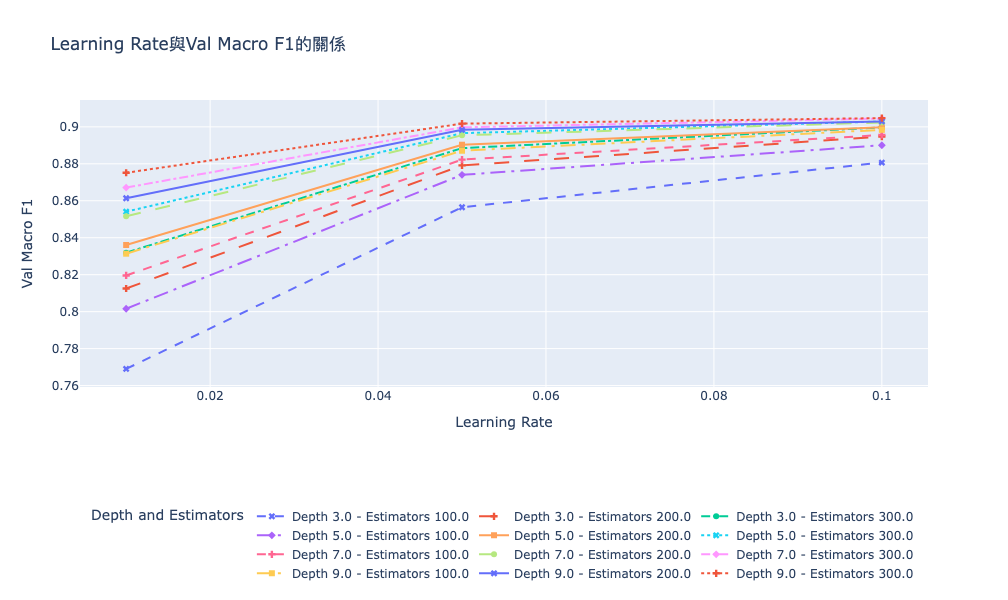

In [78]:
fig = px.line(
    grouped_results,
    x='learning_rate',
    y='Val Macro F1',
    color='Params Combination',
    markers=True,
    symbol='Params Combination',
    symbol_map=symbol_map,
    line_dash='Params Combination',
    line_dash_map=line_dash_map_corrected,
    title='Learning Rate與Val Macro F1的關係'
)

fig.update_layout(
    legend_title_text='Depth and Estimators',
    xaxis=dict(title='Learning Rate'),
    yaxis=dict(title='Val Macro F1'),
    legend=dict(
        orientation="h",  # 水平排列
        yanchor="top",    # 以圖例的頂部作為對齊點
        y=-0.4,           # 調整圖例的垂直位置，負值將其移到圖表下方
        xanchor="center", # 以圖例的中心作為對齊點
        x=0.5             # 圖例居中對齊
    ),
    height=600
)

# Save the reordered figure as an HTML file
html_file_path_ordered = 'Plot.html'
fig.write_html(html_file_path_ordered)

html_file_path_ordered

fig.show()
